In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json
import datetime
import math

In [2]:
def two_hours_forward(timestamp_string: str):
    date, time = timestamp_string.split(' ')
    year, month, day = date.split('-')
    hour, minute, second = time.split(':')
    date = datetime.datetime(int(year), int(month), int(day), int(hour), int(minute), int(second))
    date += datetime.timedelta(hours=2)
    return date

In [3]:
# Dictionary representing all stations and freestanding bikes for every 5 minutes
timestamp_dictionary = dict()

# Extracting stations info for stations in Warsaw
with open('json_files/2024-06-29-veturilo.json', 'r', encoding='utf8') as file:
    for line in file:
        data_piece = json.loads(line)
        if data_piece['city_uid'] == 812:
            timestamp = str(two_hours_forward(data_piece['timestamp']['$date'].replace('T', ' ')[:-1])).replace(':', '.')
            if not timestamp in timestamp_dictionary.keys():
                timestamp_dictionary[timestamp] = []
            timestamp_dictionary[timestamp].append(data_piece)

In [4]:
def distance_from_centre(x1, y1):
    # Pałac kultury
    center_lat = 52.230608
    center_lng = 21.007190
    # Kopernik
    center_lat = 52.239864
    center_lng = 21.031062
    return np.sqrt((x1-center_lat)**2+(y1-center_lng)**2)

In [5]:
def get_bikes(timestamps_list: list[str], station_names: list[str]):
    ret = []
    
    for single_timestamp in timestamps_list:
        single_station_data = []
        for single_station in station_names:
            for dict_timestamp in timestamp_dictionary[single_timestamp.replace('T', ' ').replace(':', '.')]:
                if single_station == dict_timestamp['name']:
                    single_station_data.append(dict_timestamp['bikes'])
        ret.append(single_station_data)
    return np.array(ret)

In [9]:
def haversine(lat, lng):
    lat2 = 52.239864
    lon2 = 21.031062
    d_lat = (lat2 - lat) * math.pi / 180.0
    d_lon = (lon2 - lng) * math.pi / 180.0
    lat = lat * math.pi / 180.0
    lat2 = lat2 * math.pi / 180.0
    a = (pow(math.sin(d_lat / 2), 2) +
         pow(math.sin(d_lon / 2), 2) *
         math.cos(lat) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c * 1000

In [10]:
bike_amount = []
distances = []
timestamps = []

first_timestamp = True
freestanding_coordinates_data = {}
for timestamp, data in timestamp_dictionary.items():
    freestanding_coordinates_data[timestamp] = []
    for station in data:
        if not station['bike']:
            bike_amount.append(len(station['bike_list']))
            if first_timestamp:
                distances.append(round(haversine(float(station['lat']), float(station['lng'])),1))
            timestamps.append(timestamp.replace(' ', 'T').replace('.', ':'))
    first_timestamp = False
x = np.asarray(timestamps, dtype='datetime64[s]')
y = np.array(bike_amount)
ttt = x

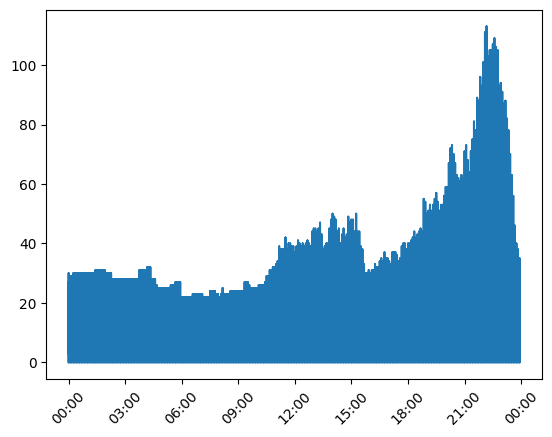

In [11]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.tick_params(axis='x', labelrotation = 45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.show()

In [241]:
ttt[0]

numpy.datetime64('2024-06-29T00:00:00')

In [244]:
stations = []
for st in timestamp_dictionary[list(timestamp_dictionary.keys())[0]]:
    if not st['bike']:
        stations.append(st['name'])
        
def wrap(station_name):
    for st in timestamp_dictionary[list(timestamp_dictionary.keys())[0]]:
        if st['name'] == station_name:
            return haversine(float(st['lat']), float(st['lng']))
        
stations = sorted(stations, key=wrap)

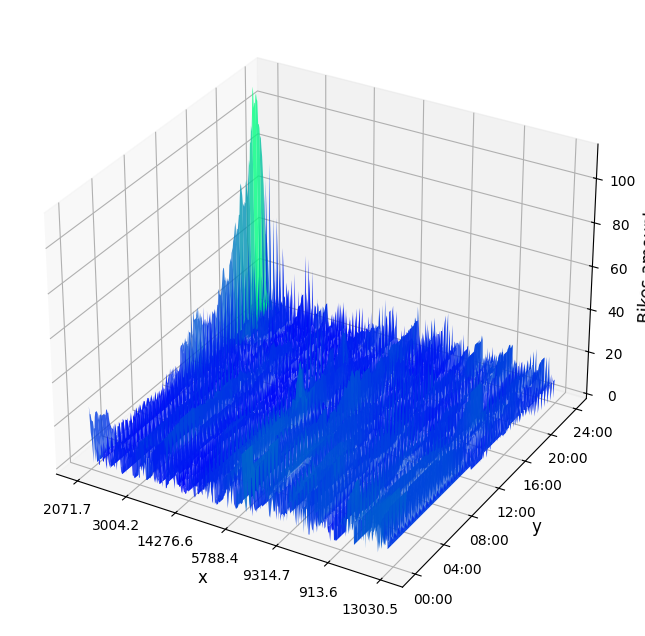

In [245]:
x = list(timestamp_dictionary.keys())
y = stations

ZZ = get_bikes(x, y)

xx = range(len(y))
# xx = np.asarray(timestamps, dtype='datetime64[s]')
yy = range(len(x))
# yy = hwdp

XX, YY = np.meshgrid(xx, yy)
 
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

dates_formatted = [
    '00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00'
]

idxs = [i * (len(yy) / (len(dates_formatted) - 1)) for i in range(len(dates_formatted))]

ax.yaxis.set_ticks(idxs)
ax.yaxis.set_ticklabels(dates_formatted)

distances2 = []
for i in range(0, len(distances), len(distances)//6):
    distances2.append(distances[i])    
idxs2 = [i * (len(xx) / (len(distances2) - 1)) for i in range(len(distances2))]

ax.xaxis.set_ticks(idxs2)
ax.xaxis.set_ticklabels(distances2)

ax.plot_surface(XX, YY, ZZ, cmap='winter', alpha=0.8)

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('Bikes amount', fontsize=12)
 
plt.show()

In [205]:
idxs

[0.0, 48.0, 96.0, 144.0, 192.0, 240.0, 288.0]

In [208]:
distances

[0.02215290014874208,
 0.059766660171028586,
 0.11364726189398283,
 0.09509045349035007,
 0.10154325925929325,
 0.09031482565448372,
 0.09128816349341227,
 0.0908167319000197,
 0.0783125013902637,
 0.059062558435950555,
 0.13758362109640856,
 0.10322416942751302,
 0.0863183823759454,
 0.06633805122250756,
 0.05610486923610042,
 0.07256808447933769,
 0.06366140661342481,
 0.0403153338817858,
 0.055582802466231124,
 0.15836429464055374,
 0.04822995426081271,
 0.13371736560746408,
 0.10918364475506416,
 0.1003037222689156,
 0.07314679625246859,
 0.06494897968405675,
 0.06295738374488095,
 0.05299739846445339,
 0.040639423470319284,
 0.1181154707055769,
 0.08839663998704866,
 0.07530473008383705,
 0.06887618405515732,
 0.04681858496366635,
 0.041868081995717794,
 0.035942428201221684,
 0.02647229814352989,
 0.19159846225896499,
 0.053363509404834045,
 0.04839049015044222,
 0.046091528288829835,
 0.042157271318244253,
 0.037318738510296975,
 0.16331542968133855,
 0.030629482431145275,
 0.02

In [218]:
len(distances)

328

In [222]:
import math

In [225]:
def haversine(lat, lng):
    lat2 = 52.239864
    lon2 = 21.031062
    d_lat = (lat2 - lat) * math.pi / 180.0
    d_lon = (lon2 - lng) * math.pi / 180.0
    lat = lat * math.pi / 180.0
    lat2 = lat2 * math.pi / 180.0
    a = (pow(math.sin(d_lat / 2), 2) +
         pow(math.sin(d_lon / 2), 2) *
         math.cos(lat) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c